## Lecture 23

#### pandas; Column Operations, Broadcasting, Boolean Indexing; Iterating Through DataFrames; matplotlib; Histograms and Bar Charts

# 1. pandas

Python is a general purpose programming language, but it is particularly widely used for data analysis.  One of the reasons for this is the presence of well-developed, user-friendly packages like NumPy, matplotlib, and pandas.  Let's talk about the latter: pandas (the name comes from "panel data", and presumably the author's affinity for panda bears) is a package that allows you create objects called `DataFrames`, which, roughly speaking, function as spreadsheet tables.    

Let's jump right in.


In [1]:
# EXAMPLE 1a: A pandas DataFrame

import pandas as pd # "pd" is a widely used nick-name for the pandas module.

# There are many ways to create a pandas data frame.
# Perhaps the simplest way is pd.read_csv().
cereal_df = pd.read_csv("cereal.csv")

# You can print a DataFrame object, which will display it as
# a (usually truncated) table.
print(cereal_df)


# pandas is smart enough to realize that the first row of your .csv file
# probably consists of column names.  Those column names will be rather 
# important, so here's how you can extract them
print("\n\ncereal_df.columns:\n\n")
print(cereal_df.columns)


# A very common technique that people use to quickly inspect a data set is 
# to look at the first 5 rows.  This is so common, that there is a special 
# function for that:  .head()
print("\n\nHERE'S THE HEAD:\n\n")
print(cereal_df.head())

                                      name mfr type  calories  protein  fat  \
0                                100% Bran   N    C        70        4    1   
1                        100% Natural Bran   Q    C       120        3    5   
2                                 All-Bran   K    C        70        4    1   
3                All-Bran with Extra Fiber   K    C        50        4    0   
4                           Almond Delight   R    C       110        2    2   
5                  Apple Cinnamon Cheerios   G    C       110        2    2   
6                              Apple Jacks   K    C       110        2    0   
7                                  Basic 4   G    C       130        3    2   
8                                Bran Chex   R    C        90        2    1   
9                              Bran Flakes   P    C        90        3    0   
10                            Cap'n'Crunch   Q    C       120        1    2   
11                                Cheerios   G    C 




Ok, so that's lesson one:

* `import pandas as pd` loads the pandas module.
* `pd.read_csv()` produces a `DataFrame` object from a Comma Separated Value (or CSV) spreadsheet.  
* And what is a `DataFrame`? As indicated, it's essentially a table.  It has many rows, each with their own row index (which by default is 0-based numbering), and many columns, each with their own name.  Every row has a value for each column.
* If you want to see the list of column names for a `DataFrame`, there is an attribute variable called `.columns`; so, if `df` is the name of a `DataFrame`, then`df.columns` would provide the column names of this `DataFrame`.
* And if you want to look at the first 5 rows of `df` just to see what the data "looks like", use `df.head()`.


<br><br><br><br><br><br><br><br><br><br>

There are actually many ways to look at a `DataFrame`.  The main developer of pandas has suggested that you think of a `DataFrame` as being almost like a dictionary, where the *keys* would be the column names, and the *values* would be the list of values in each column.  (Actually, the proper pandas name for the "list" of values is `Series`.) This might not be so obvious when you print out a whole DataFrame, but when you bring the square brackets `[]`, it might make some sense. 


In [1]:
# EXAMPLE 1b: Dictionary-like syntax

import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

# We're treating cereal_df like a dictionary here.
# The key is a column name, the value is the column itself.
one_col = cereal_df["name"]
print(one_col)

# Note that when you print out the names, you the corresponding row indices are also displayed.

print("#######################################")


# Here's something you CAN'T do with dictionaries:
# instead of providing ONE key, you can provide a LIST of them.
# (This of course makes perfect sense for tables.)
choose_cols = ["name", "mfr", "rating"]
smaller_df = cereal_df[choose_cols]
print(smaller_df)



0                                  100% Bran
1                          100% Natural Bran
2                                   All-Bran
3                  All-Bran with Extra Fiber
4                             Almond Delight
5                    Apple Cinnamon Cheerios
6                                Apple Jacks
7                                    Basic 4
8                                  Bran Chex
9                                Bran Flakes
10                              Cap'n'Crunch
11                                  Cheerios
12                     Cinnamon Toast Crunch
13                                  Clusters
14                               Cocoa Puffs
15                                 Corn Chex
16                               Corn Flakes
17                                 Corn Pops
18                             Count Chocula
19                        Cracklin' Oat Bran
20                    Cream of Wheat (Quick)
21                                   Crispix
22        

So, if `df` is a `DataFrame`:

* `df[ <column_name> ]` produces a new smaller `DataFrame`: one that contains only one column, with the given name.  Because this is a `DataFrame`, it also still has row indices.
* `df[ <list> ]` also produces a smaller `DataFrame`, which contains all the columns whose names are in `<list>`.

<br><br><br><br><br><br><br><br><br><br>


Confusingly, you can also sometimes use `[]` to access particular ROWS from a `DataFrame`.  We'll avoid that here: if we want to select a subset of rows from a `DataFrame`, we'll use `.iloc[]` (short for "index location"). 


In [11]:
# EXAMPLE 1c: .iloc[]

import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

# This is how you select just row 5 (actually, the sixth row)
print("ROW 5: ")
print(cereal_df.iloc[5])
# Note the SQUARE!!!!!!!!!!!! brackets -- .iloc isn't a function!


# And this is how you select just the first 3 rows
print("ROWS 0-2: ")
print(cereal_df.iloc[0:3])


# How would you print just the  name, mfr, and rating columns for just rows 10-15?

print("Name MFR and Rating for Rows 10-15")
print(cereal_df[['name','mfr','rating']].iloc[10:16])

# And how would you access the name of the cereal in row 20 using .iloc[]?

print("Name at Row 20")
print(cereal_df['name'].iloc[20])



# Here's another way to retrieve a single entry: .at[<row>, <col>]
print("Another way")
print(cereal_df.at[20, 'name'])


ROW 5: 
name        Apple Cinnamon Cheerios
mfr                               G
type                              C
calories                        110
protein                           2
fat                               2
sodium                          180
fiber                           1.5
carbo                          10.5
sugars                           10
potass                           70
vitamins                         25
shelf                             1
weight                            1
cups                           0.75
rating                      29.5095
Name: 5, dtype: object
ROWS 0-2: 
                name mfr type  calories  protein  fat  sodium  fiber  carbo  \
0          100% Bran   N    C        70        4    1     130   10.0    5.0   
1  100% Natural Bran   Q    C       120        3    5      15    2.0    8.0   
2           All-Bran   K    C        70        4    1     260    9.0    7.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  
0  

So, if `df` is a DataFrame, 

* `df.iloc[]` can be used to produce a new DataFrame which contains an individual row, or containing a range of rows (via slicing).  You can also combine this with column selection, as before.
* While you can use `.iloc[]` to retrieve a single entry in a single row, `df.at[<row number>, <col name>]` is a slightly more compact way. 



<br><br><br><br><br><br><br><br><br><br>

# 2. Column Operations, Broadcasting and Boolean Indexing

pandas allows you to perform operations on columns in a couple of different ways.  If you want to add or subtract or multiply or divide two columns, then pandas will perform those operations item-by-item, and produce a new column from them (if the two columns aren't the same size, funny things can happen).

You can also perform an operation between a column and a single value. pandas will interpret such an expression to mean that you want to perform that operation between your single value and *each individual entry* of the column, to form a new column.  This is called *broadcasting*.

In [12]:
# EXAMPLE 2a: Column operations

import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

# Here is a basic column operation: adding two columns together, to produce a new
# column. (Obviously, ordinary Python lists don't behave this way!!!!)
sugar_plus_fat = cereal_df['sugars'] + cereal_df['fat']
print(sugar_plus_fat)

# sugar_plus_fat is a column, whereas 1 is just a plain old number.  
# However, pandas is built to deal with operations like this.
# Whenever it sees an expression like "column plus number", it adds the number to 
# EACH ENTRY of the column. This is called BROADCASTING.
plus_1 = sugar_plus_fat + 1
print(plus_1)


# As we'll see, this is particularly useful for Boolean operations.
# Let's retrieve a list which contains True for the General Mills cereals,
# and False for the others.  (General Mills is "G" in the "mfr" column.)
gm = cereal_df['mfr'] == 'G'
print(gm)


0      7
1     13
2      6
3      0
4     10
5     12
6     14
7     10
8      7
9      5
10    14
11     3
12    12
13     9
14    14
15     3
16     2
17    12
18    14
19    10
20     0
21     3
22    11
23     5
24    14
25    11
26     7
27    12
28    12
29    13
      ..
47     7
48    10
49     9
50     2
51    12
52    15
53     3
54     0
55     0
56     7
57     1
58    13
59    10
60     6
61     2
62     3
63     0
64     0
65     0
66    16
67     3
68     5
69     4
70    15
71     4
72     4
73    13
74     4
75     4
76     9
Length: 77, dtype: int64
0      8
1     14
2      7
3      1
4     11
5     13
6     15
7     11
8      8
9      6
10    15
11     4
12    13
13    10
14    15
15     4
16     3
17    13
18    15
19    11
20     1
21     4
22    12
23     6
24    15
25    12
26     8
27    13
28    13
29    14
      ..
47     8
48    11
49    10
50     3
51    13
52    16
53     4
54     1
55     1
56     8
57     2
58    14
59    11
60     7
61     3
62     4
63 

<br><br><br><br><br><br><br><br><br><br>

You can use Boolean column operations to select rows meeting interesting criteria.

Suppose that you have a `DataFrame` called `df`, and that you also have a column `b` of Boolean values of the same length.   Then `df[b]` will produce a new `DataFrame` with fewer rows: specifically, it will keep all the rows of `df` where `b` has the value `True`, and throw out all the values of `df` where `b` has the value `False`.  This is called *Boolean indexing*.

If you're paying close attention, this might be confusing -- before, when we wrote something like `df[ ]`, we were selecting **columns**, whereas now we're using `df[  ]` to select **rows**.  The difference is of course what goes inside those square brackets: pandas is smart enough to know that if there is a list of strings, it's selecting columns, and if there is a pandas column containing Boolean values, it's selecting rows.

In [19]:
# EXAMPLE 2b: Boolean indexing with DataFrames

import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

# First, let's identify the General Mills cereals again.
gm = cereal_df['mfr'] == 'G'

# Now, we can use this column to select rows.  
print("\n\nAll the General Mills cereals:\n\n")
print(cereal_df[gm])

# Retrieve the names of all the cereals which have sugars > 12
print("\n\nAll the really really sugary cereals:\n\n")

sweet = cereal_df['sugars'] > 12
print(cereal_df[sweet][['name','sugars']])




All the General Mills cereals:


                       name mfr type  calories  protein  fat  sodium  fiber  \
5   Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
7                   Basic 4   G    C       130        3    2     210    2.0   
11                 Cheerios   G    C       110        6    2     290    2.0   
12    Cinnamon Toast Crunch   G    C       120        1    3     210    0.0   
13                 Clusters   G    C       110        3    2     140    2.0   
14              Cocoa Puffs   G    C       110        1    1     180    0.0   
18            Count Chocula   G    C       110        1    1     180    0.0   
22   Crispy Wheat & Raisins   G    C       100        2    1     140    2.0   
31           Golden Grahams   G    C       110        1    1     280    0.0   
36       Honey Nut Cheerios   G    C       110        3    1     250    1.5   
40                      Kix   G    C       110        2    1     260    0.0   
42             Lu

<br><br><br><br><br><br><br><br><br><br>

If you want to perform more sophisticated Boolean operations involving multiple columns, you can, but there are a couple of sticking points. 

1. Use parentheses LIBERALLY. 
2. `and` doesn't work for pandas columns -- use `&` in its place.  Likewise, use `|` in place of `or`, and `~` in place of `not`.

In [ ]:
# EXAMPLE 2c: More sophisticated Boolean indexing

import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

# Let's try to identify the cereals with high sugar AND high sodium:
# sugars > 12 and sodium > 200

# This feels like it should work.  But it doesn't, because pandas

unhealthy = cereal_df['sugars'] > 12 and cereal_df['sodium'] > 200

# USE & instead.......

unhealthy = cereal_df['sugars'] > 12 & cereal_df['sodium'] > 200

# .....AND!!!! put both individual expression in parentheses.
unhealthy = (cereal_df['sugars'] > 12) & (cereal_df['sodium'] > 150)

# Now, we can use this column to select the super unhealthy rows.  
print(cereal_df[unhealthy])



<br><br><br><br><br><br><br><br><br><br>


# 3. Iterating Through DataFrames

Generally, looping through `DataFrame`s is discouraged.  That being said, given that I'm giving a limited introduction to pandas, perhaps you should be aware of how to loop through a `DataFrame`.

It's tempting to expect that if I wrote a loop like



In [ ]:
for row in df:
    <do something with <row>>

then the iteration variable `row` would represent the first row, then the second row, etc.  Alas, that's not the case.

In [2]:
# EXAMPLE 3a: Looping through a DataFrame gives column names :(

import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

for r in cereal_df:
    print(r)
    
# It's going to just print the names of the columns.  That could be useful,
# but it sure wasn't what I was expecting.

name
mfr
type
calories
protein
fat
sodium
fiber
carbo
sugars
potass
vitamins
shelf
weight
cups
rating


<br><br><br><br><br><br><br><br><br><br>

So, how can I loop through the rows of a `DataFrame`?  One way:  `df.index` will provide a "list" of the all row indices, and you can loop through this, using `df.iloc[<index>]` to access individual rows.  

However, a slightly preferred way is to use `.iterrows()`, which works as follows.  If `df` is a `DataFrame`, then

In [ ]:
for idx, r in df.iterrows():

will loop through the rows of `df`.  For each iteration of the loop, `idx` will be assigned to be the *index* of one row after another, and `r` will be assigned to be the corresponding *row itself*.  If you are interested not in entire rows, but just some specific columns in each row, you can write `r[<col name>]` to retreive a specific entry in the row `r`.

In [21]:
# EXAMPLE 3b: .iterrows()


import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

# To make this less tedious, let's use just the first 10 rows of cereal_df
short_df = cereal_df.iloc[0:10]

for idx, r in short_df.iterrows():
    print("\n\nHere is row", idx, ":\n\n") # idx will be the row index
    print(r)   # r will be the row itself.  
    
    # You can select individual columns from r using [] as before -- of course,
    # r['name'] will be just one string, rather than an entire column, since r is 
    # just one row!
    print("\n\nThe cereal we just saw was", r['name'], ".\n\n")
    




Here is row 0 :


name        100% Bran
mfr                 N
type                C
calories           70
protein             4
fat                 1
sodium            130
fiber              10
carbo               5
sugars              6
potass            280
vitamins           25
shelf               3
weight              1
cups             0.33
rating         68.403
Name: 0, dtype: object


The cereal we just saw was 100% Bran .




Here is row 1 :


name        100% Natural Bran
mfr                         Q
type                        C
calories                  120
protein                     3
fat                         5
sodium                     15
fiber                       2
carbo                       8
sugars                      8
potass                    135
vitamins                    0
shelf                       3
weight                      1
cups                        1
rating                33.9837
Name: 1, dtype: object


The cereal we just saw was 100% Natur

<br><br><br><br><br><br><br><br><br><br>

Of course, there is tons more to say about pandas.  You can create `DataFrame`s from other sources than CSV spreadsheets.  You can create `DataFrame`s from scratch in Python, and then export them to spreadsheets.  You can edit entries in a `DataFrame`, abd add or delete columns.  You can sort, reindex, perform simple statistics, etc.  I suggest the book *Python for Data Analysis*, or the page http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html, as starting points for further study.


For now, a summary (where `df` always denotes some `DataFrame` object).

* `import pandas as pd` loads the pandas module.
* `pd.read_csv()` produces a `DataFrame` object from a Comma Separated Value (or CSV) spreadsheet.  
* `df.columns` would provide the column names of this `df`.
* `df.head()` provides the first 5 rows of `df`.
* `df[ <column_name> ]` produces a new smaller `DataFrame`: one that contains only one column, with the given name.  
* `df[ <list> ]` also produces a smaller `DataFrame`, which contains all the columns whose names are in `<list>`.
* `df.iloc[]` can be used to produce a new DataFrame which contains an individual row, or containing a range of rows (via slicing).  You can also combine this with column selection.
* `df.at[<row number>, <col name>]` retrieves the value at row `<row number>`, column `<col name>`.
* You can perform column operations to create new columns.
* If you create a Boolean column called `b` (of the same si, then `df[b]` will select the rows from `df` where `b` has the value `True`.
* `for idx, r in df.iterrows():` will iterate through the rows of `df`: for each row in `df`, `idx` will be assigned the row index, and `r` will be assigned the row itself.



<br><br><br><br><br><br><br><br><br><br>

# 4. matplotlib

Next, let's talk a little bit about matplotlib.  This package exists to help you visualize data; it makes producing two-dimensional plots and graphs simple.  Here's how it works.

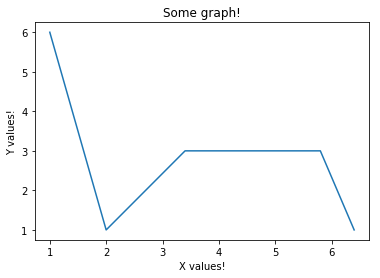

In [23]:
# EXAMPLE 4a: matplotlib

# We'll focus on the pyplot module of matplotlib.  
# The "as" just gives this module a nickname.  "plt" is a very common choice.
import matplotlib.pyplot as plt  

x_values = [1.0, 2.0, 3.4, 5.8, 6.4]
y_values = [6.0, 1.0, 3.0, 3.0, 1.0]

# This creates a simple line plot of x-values vs y-values.  
plt.plot(x_values, y_values)

# You can add a title and labels very easily.
plt.title("Some graph!")
plt.ylabel("Y values!")
plt.xlabel("X values!")

# And finally, show your graph.
plt.show()

The `pyplot` module creates a figure object, which you can add data and features to, before finally displaying it with `plt.show()`.

`plt.plot()` takes two lists, and creates a line graph out of them: the first list is the $x$-axis, and the second list is $y$-axis.  Note that the points are connected in the order they are listed.

<br><br><br><br><br><br><br><br><br><br>

You can add additional styling parameters to `.plot()`, `.title()`, and `.xlabel()` and `.ylabel()`.

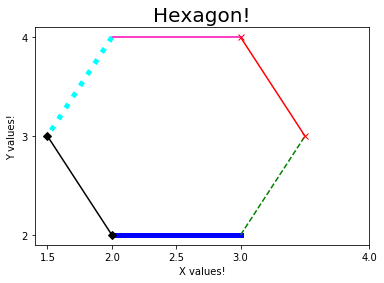

In [29]:
# EXAMPLE 4b: Hexagon

import matplotlib.pyplot as plt  

# Observe the stylistic parameters, all of which are optional: linewidth, linestyle, color.
plt.plot([2,3], [2,2], linewidth = 5, color = 'blue')
plt.plot([3,3.5], [2,3], linestyle = 'dashed', color = 'green')
plt.plot([3.5,3], [3,4], marker = 'x', color = 'red')
plt.plot([3,2], [4,4], color = (1,0,0.7)) # Color = (Red, Green, Blue), each part on a scale of 0 to 1.
plt.plot([2,1.5], [4,3], linewidth = 5, linestyle = 'dotted', color = 'cyan')
plt.plot([1.5,2], [3,2], marker = 'D', color = 'black')

# There are different stylistic parameters for the title and labels.
plt.title("Hexagon!", fontsize = 20)
plt.ylabel("Y values!")
plt.xlabel("X values!")

# You can specify which ticks you want to appear on the x and y axes.
plt.xticks([1.5,2,2.5,3,4])
plt.yticks([2,3,4])

plt.show()

So `.plot()` has style parameters `linewidth`, `color`, and `linestyle`, and `.title()` has style parameter `fontsize`.  There are others.  In addition, `.xticks()` and `.yticks()` allow you to specify which values you want to appear on the $x$ and $y$ axes.

<br><br><br><br><br><br><br><br><br><br>

Let's plot a fake stock chart.  We'll simulate a stock price over a day.  Let's assume that the stock starts at a price of $100, and we'll assume a "binomial" model: every minute, the stock either increases in price by 0.2%, or decreases in price by 0.2%, each move happening with probability 1/2, with each minute's move independent of the last minute.  Then we'll plot the stock's price over the course of a day. 

In [ ]:
# EXAMPLE 4c: Stock chart

import matplotlib.pyplot as plt
import random

# These will be lists of times and corresponding prices.
time = [0]
price = [100]

current_price = 100

#
# Build up the list of times and price,
# and then plot a stock chart!
#




# You can save figures, too!  Let's do this before showing the figure.
plt.savefig('stock.png')

plt.show()

<br><br><br><br><br><br><br><br><br><br>

# 5. Histograms, Bar Charts

We've been looking at line plots, but sometimes that's not appropriate for the data we're concerned with.

`plt.hist()` and `plt.bar()` respectively give histograms and bar charts.  Both these types of graphs are meant for showing frequency counts.

Histograms are intended for continuous numerical data, which has to be grouped into intervals.  To plot these, pass `plt.hist()` a list of numerical data. `matplotlib` will choose bins, and then count the number of elements from the provided data lie in each bin.  You can also provide your own list of bins.

Bar charts are intended for discrete or non-numerical data.  For these, you provide `plt.bar()` a list of $x$-values where you want to plot your bars, and a list of corresponding frequencies; then, use `plt.xticks()` to provide labels underneath each bar.

In [ ]:
# EXAMPLE 5a: Histogram

import matplotlib.pyplot as plt
import pandas as pd

cereal_df = pd.read_csv("cereal.csv")

sugar_values = cereal_df['sugars']
print(list(sugar_values))
# Histograms show frequencies of numerical data; usually this data takes on continuous values, 
# and needs to be binned if the shape of the distibution is to be visible.  
# Here, the first bin contains values between 0 and 3, the second contains values from 3 to 6, etc.
plt.hist(sugar_values, bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], edgecolor = 'black')

# NOTICE: you don't have to perform any counts on the unsorted data.  matplotlib performs
# the counts for you!



plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.title("SUGAR!!!!!!!!!!!!!!!")
plt.ylabel("Number of cereals")
plt.xlabel("Number of...grams, per, uh...serving I guess")


plt.show()


<br><br><br><br><br><br><br><br><br><br>

In [ ]:
# EXAMPLE 5b: Bar chart

import matplotlib.pyplot as plt

candidates = ["Alice", "Bob", "Carol"]
votes = [12, 4, 6]


# Bar charts show frequencies of categorical data. These are a bit awkward: 
# the first argument is the group of x-values where the bars are to be centered,
# and the second argument is the data (frequencies!) being plotted above each of the x-values.
plt.bar([0,1,2], votes, edgecolor = 'black')

# Then, to label the bars properly, change the x-ticks.  The first argument is again the x-values, and the second
# argument contains the desired labels at those x-values.
plt.xticks([0,1,2], candidates)

plt.title("Election Results")
plt.ylabel("Votes")
plt.xlabel("Candidates")

plt.show()
